In [1]:
# importing the data

import pandas as pd

df = pd.read_csv("CreditCardApplications.csv")

# Summary of results:

2.    Draw a histogram for the ranges of the income, credit scores and debt levels of the applicants who were approved ? What are the means, medians and ranges look like? What do you infer?
A. Histograms and 7 number summaries of requested variables are provided below, we can see that even for customers who are approved for a credit card, credit score and income are in the lower ranges, and also most people seem to have debt less than 10. We can also infer that though the 50th percentiles are less for each of these variables the mean is high which means outliers could be pulling the mean towards the higher value ranges
3.    Prepare the data set by removing outliers and impute missing values and run various models to predict the approval rating
Missing values are removed, though we do not have any null values, we have removed columns with special characters. Outliers are treated using z score, as the thumb rule is 99.97% of the data lies less than 3 standard deviations from the mean
4.    How do you create train and test data sets for model testing and accuracy?  Show at least 2-3 model approaches for the solution. Which one do you prefer and why? Show the confusion matrix for the accuracy? What are other methods used to show the accuracy?
A. Usedd 80-20 split to create train and test datasets, Built LGBM, Logistic regression, and random forest models to perform binary classification. Looking at the evaluation metrics we could say that random forest is performing better. We have looked at accuracy, precision, recall, and AUC values to choose the best model. 
5.    What are the predictors from the approved model? Why?
A. the most important variables from the model are prior defaulter, credit score, employed, number of years employed, income

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender           690 non-null object
Age              690 non-null object
Debt             690 non-null float64
Married          690 non-null object
BankCustomer     690 non-null object
Education        690 non-null object
Ethnicity        690 non-null object
YearsEMployed    690 non-null float64
PriorDef         690 non-null object
Employed         690 non-null object
CreditScore      690 non-null int64
DriverLicense    690 non-null object
Citizen          690 non-null object
Zipcode          690 non-null object
Income           690 non-null int64
Approved         690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [3]:
df.tail()

,Gender,Age,Debt,Married,BankCustomer,Education,Ethnicity,YearsEMployed,PriorDef,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,Approved
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,00000,0,-


In [4]:
import numpy as np

# here, we are assuming "+" represents approved
df['approved_relabel'] = np.where(df['Approved'] == "+", 1, 0)

import seaborn as sns

df_approved = df[df['approved_relabel'] == 1]

In [5]:
df.shape

(690, 17)

In [6]:
df_approved.shape

(307, 17)

(array([294.,   8.,   1.,   1.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000., 100000.]),
 <a list of 10 Patch objects>)

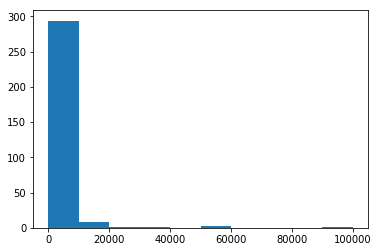

In [7]:
import matplotlib.pyplot as plt

plt.hist(df_approved['Income'])

(array([220.,  65.,  19.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  6.7, 13.4, 20.1, 26.8, 33.5, 40.2, 46.9, 53.6, 60.3, 67. ]),
 <a list of 10 Patch objects>)

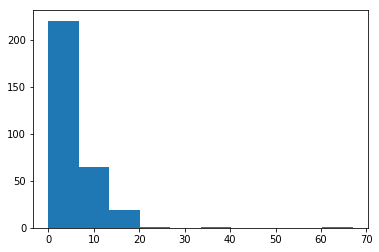

In [8]:
plt.hist(df_approved['CreditScore'])

(array([120.,  58.,  32.,  45.,  27.,  13.,   4.,   5.,   2.,   1.]),
 array([ 0. ,  2.8,  5.6,  8.4, 11.2, 14. , 16.8, 19.6, 22.4, 25.2, 28. ]),
 <a list of 10 Patch objects>)

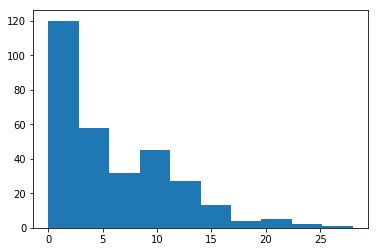

In [9]:
plt.hist(df_approved['Debt'])

In [10]:
# summaries

df_approved[['Income','CreditScore','Debt']].describe()

,Income,CreditScore,Debt
count,307.000000,307.000000,307.000000
mean,2038.859935,4.605863,5.904951
std,7659.763941,6.320242,5.471485
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.500000
50%,221.000000,3.000000,4.460000
75%,1209.000000,7.000000,9.520000
max,100000.000000,67.000000,28.000000


In [11]:
# we need to use complete dataset here, df

In [12]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Education,Ethnicity,YearsEMployed,PriorDef,Employed,CreditScore,DriverLicense,Citizen,Zipcode,Income,Approved,approved_relabel
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+,1


In [13]:
df[df['Age']!= '?'].shape

(678, 17)

In [14]:
# from this code we can understand that there are no missing values in the data
df.isnull().all()

Gender              False
Age                 False
Debt                False
Married             False
BankCustomer        False
Education           False
Ethnicity           False
YearsEMployed       False
PriorDef            False
Employed            False
CreditScore         False
DriverLicense       False
Citizen             False
Zipcode             False
Income              False
Approved            False
approved_relabel    False
dtype: bool

In [15]:
# here, we need to take additional care for special notations
for col in ['Gender', 'Age', 'Married', 'BankCustomer', 'Education', 'Ethnicity','PriorDef', 'Employed', 'DriverLicense', 'Citizen', 'Zipcode']:
    df = df[df[col] != '?']

In [16]:
df.shape

(653, 17)

In [42]:
df['Age'] = df['Age'].astype(float)

In [44]:
# outlier treatment

# we could use the rule of thumb that tells all data should be within 3 sd's
import scipy 
from scipy import stats
df_cleaned = df[(np.abs(stats.zscore(df[['Debt','Age','YearsEMployed','CreditScore','Income']])) < 3).all(axis = 1)]

In [45]:
# we can
df_cleaned.shape

(613, 17)

In [46]:
# since, we have categorical columns we need to perform one hot encoding

df_cleaned = pd.get_dummies(df_cleaned, columns = ['Gender', 'Married', 'BankCustomer', 'Education', 'Ethnicity', 'PriorDef', 'Employed', 'DriverLicense', 'Citizen', 'Zipcode'])

x = df_cleaned.drop(['Approved','approved_relabel'], axis = 1)
y = df_cleaned['approved_relabel']

In [47]:
import sklearn

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 3)

# LGBM

In [59]:
# the probemd at hand is binary classification problem

import lightgbm as lgbm

lgb = lgbm.LGBMClassifier(learning_rate=0.01, n_estimators=50, boosting_type= 'gbdt', max_depth= 3, num_leaves= 100, objective= 'binary', metrics = "auc",
                        random_state = 5)

lgb.fit(x_train, y_train)
predictions = lgb.predict(x_test)

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [60]:
# calculating evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("AUC:", roc_auc_score(y_test, predictions))

Accuracy: 0.8130081300813008
Precision: 0.8292682926829268
Recall: 0.68
AUC: 0.7920547945205481


In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[66,  7],
       [16, 34]], dtype=int64)

# logistic regression

In [90]:
from sklearn.linear_model import LogisticRegression

LogisticModel = LogisticRegression()

LogisticModel.fit(x_train,y_train)
predictions_Logistic = LogisticModel.predict(x_test)

In [91]:
print("Accuracy:", accuracy_score(y_test, predictions_Logistic))
print("Precision:", precision_score(y_test, predictions_Logistic))
print("Recall:", recall_score(y_test, predictions_Logistic))
print("AUC:", roc_auc_score(y_test, predictions_Logistic))

Accuracy: 0.8617886178861789
Precision: 0.8235294117647058
Recall: 0.84
AUC: 0.8583561643835615


In [92]:
confusion_matrix(y_test, predictions_Logistic)

array([[64,  9],
       [ 8, 42]], dtype=int64)

# Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(max_depth = 10, random_state = 5, n_estimators= 500)

RandomForest.fit(x_train, y_train)
predictions_random_forest = RandomForest.predict(x_test)

In [94]:
print("Accuracy:", accuracy_score(y_test, predictions_random_forest))
print("Precision:", precision_score(y_test, predictions_random_forest))
print("Recall:", recall_score(y_test, predictions_random_forest))
print("AUC:", roc_auc_score(y_test, predictions_random_forest))

Accuracy: 0.8617886178861789
Precision: 0.851063829787234
Recall: 0.8
AUC: 0.852054794520548


In [95]:
confusion_matrix(y_test, predictions_random_forest)

array([[66,  7],
       [10, 40]], dtype=int64)

In [96]:
importances = RandomForest.feature_importances_

In [103]:
for name, importance in zip(x_train.columns, RandomForest.feature_importances_):
    print(name, "=", importance)

Age = 0.03403090448641002
Debt = 0.04002013102383879
YearsEMployed = 0.05506591490145608
CreditScore = 0.08152464498964725
Income = 0.05045472837004686
Gender_a = 0.0054608023966300654
Gender_b = 0.005181056357551965
Married_l = 0.0009899717769202739
Married_u = 0.0073599710709718056
Married_y = 0.00822593300351642
BankCustomer_g = 0.006887762596631072
BankCustomer_gg = 0.0008941422099076004
BankCustomer_p = 0.007537658549339867
Education_aa = 0.004490940616429817
Education_c = 0.004962784130611772
Education_cc = 0.006874468925498268
Education_d = 0.0023801256692389883
Education_e = 0.0012562067065093733
Education_ff = 0.007296537055101864
Education_i = 0.00713209736718155
Education_j = 0.0005301523889335072
Education_k = 0.006180418329747244
Education_m = 0.0023333938348153154
Education_q = 0.007798429866296047
Education_r = 6.862274052839859e-05
Education_w = 0.00767595825487688
Education_x = 0.00797534865101531
Ethnicity_bb = 0.005050281659523337
Ethnicity_dd = 0.0001052226365651312

In [104]:
d = []
for name, importance in zip(x_train.columns, RandomForest.feature_importances_):
    d.append(
        {
            'Variable': name,
            'Importance': importance,
        }
    )
temp = pd.DataFrame(d)

In [106]:
# sorted values of variable importances
temp.sort_values('Importance', ascending= False)

,Importance,Variable
36,0.187002,PriorDef_f
37,0.171030,PriorDef_t
3,0.081525,CreditScore
38,0.059894,Employed_f
2,0.055066,YearsEMployed
39,0.054993,Employed_t
4,0.050455,Income
1,0.040020,Debt
0,0.034031,Age
30,0.009774,Ethnicity_h
